<a href="https://colab.research.google.com/github/sejeong-park/Deeplearning_system/blob/main/L2_regularization_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#autoencoder
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt

In [17]:
(x_train, _),(x_test, _)=mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [18]:
hid_dim=128

class Autoencoder(Model):
  def __init__(self,hid_dim):
    super(Autoencoder,self).__init__()
    self.hid_dim=hid_dim
    self.encoder=tf.keras.Sequential([layers.Flatten(),
                                      layers.Dense(hid_dim,activation='relu'),])
    self.decoder=tf.keras.Sequential([layers.Dense(28*28,activation='sigmoid'),
                                      layers.Reshape((28,28))])
  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

autoencoder=Autoencoder(hid_dim)

In [19]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())


In [21]:
autoencoder.fit(x_train,x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0356 - val_loss: 0.0053
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.001

In [22]:
encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

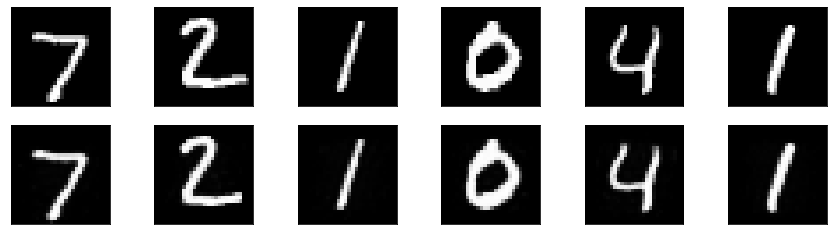

In [30]:

no=6
plt.figure(figsize=(15,4))
for i in range(no):
  ax=plt.subplot(2,no,i+1)
  plt.imshow(x_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax= plt.subplot(2,no,i+1+no)
  plt.imshow(decoded_imgs[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()